In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df['Potability'] = df['Potability'].astype('category')

In [6]:
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

## Statiscal Analysis

In [7]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [8]:
#Potability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [9]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


## Check for missing Values

In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df[df['Sulfate'].isnull()]


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,70.300213,4.777382,0
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,56.651604,4.268429,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [12]:
df[df['ph'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567414,10.333918,NaN,554.820086,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224226,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0
...,...,...,...,...,...,...,...,...,...,...
3224,NaN,198.218700,31081.735264,7.419106,NaN,517.925946,11.711419,85.428785,3.345543,1
3229,NaN,203.204659,10643.186771,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
3231,NaN,225.754109,28194.452646,5.892830,366.201583,418.272901,17.306832,103.912548,3.855895,1
3245,NaN,188.536608,24711.414927,7.129520,NaN,555.548534,16.959269,56.038702,4.331691,1


In [13]:
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


#### Since the null values are on both 0 and 1 of potability so we will replace the null values based on sample mean from both classes

In [14]:
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [15]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Exploratory Data Analysis

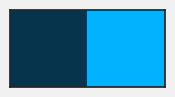

In [16]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

In [23]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 2.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Text(0.8, 1500, 'Safe for Human consumption')

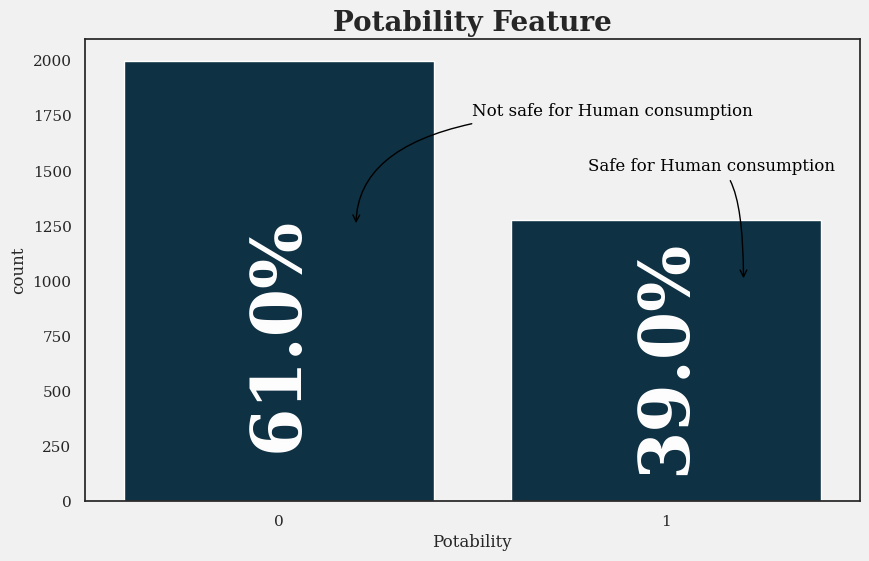

In [17]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

##### There is an imbalance in the target variable

### Distribution plots

In [18]:
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


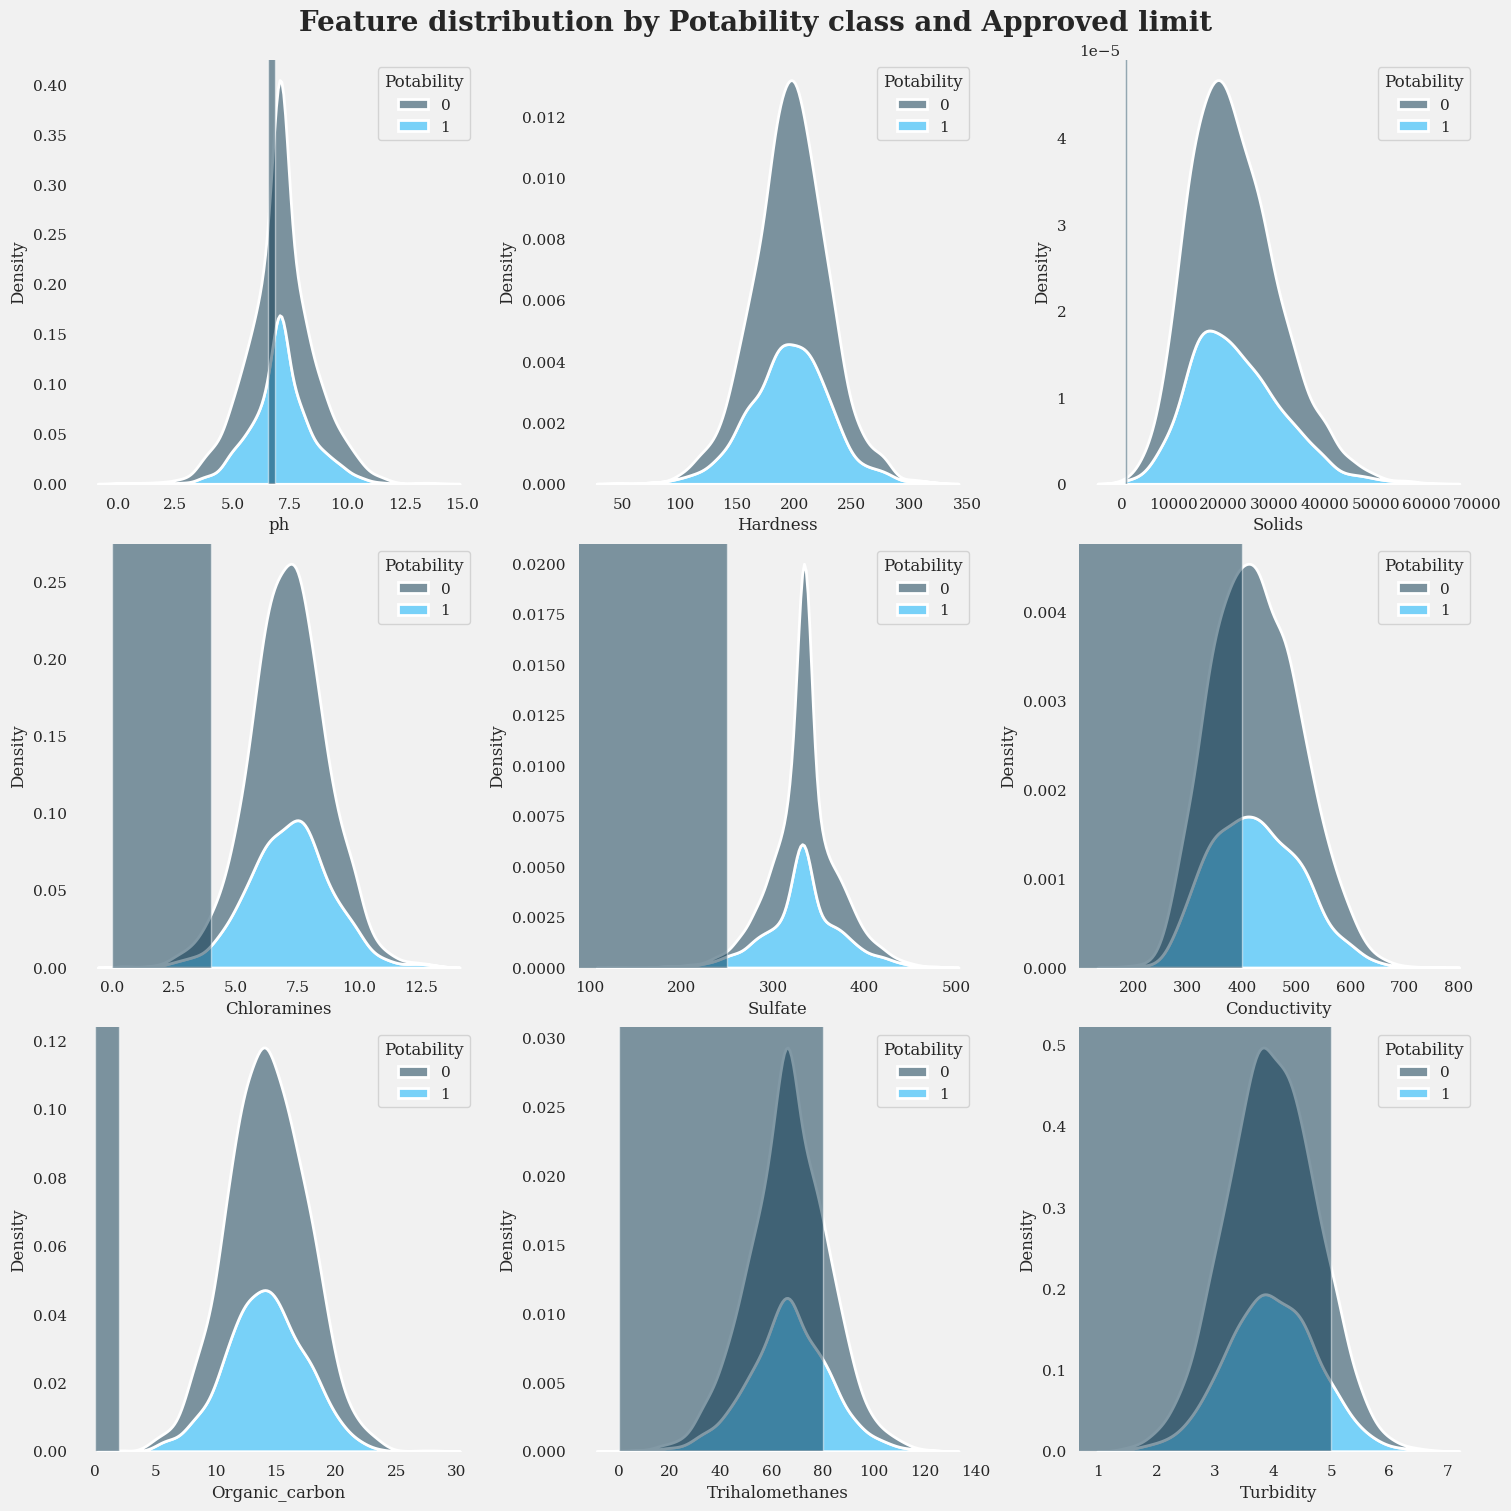

In [19]:
from matplotlib.patches import Rectangle
int_cols = df.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

##### Based on the approved limit, we can clearly see the difference in the water classification. Ex: distribution of non potable water is high on conductivity compared to potable water. same applicable to Turbidity, Trihalomethanes.
But, Ph value, Chloramines, Sulfate, Organic carbon presence doesn't show significant difference. I hope the hypothetical testing can help us here.

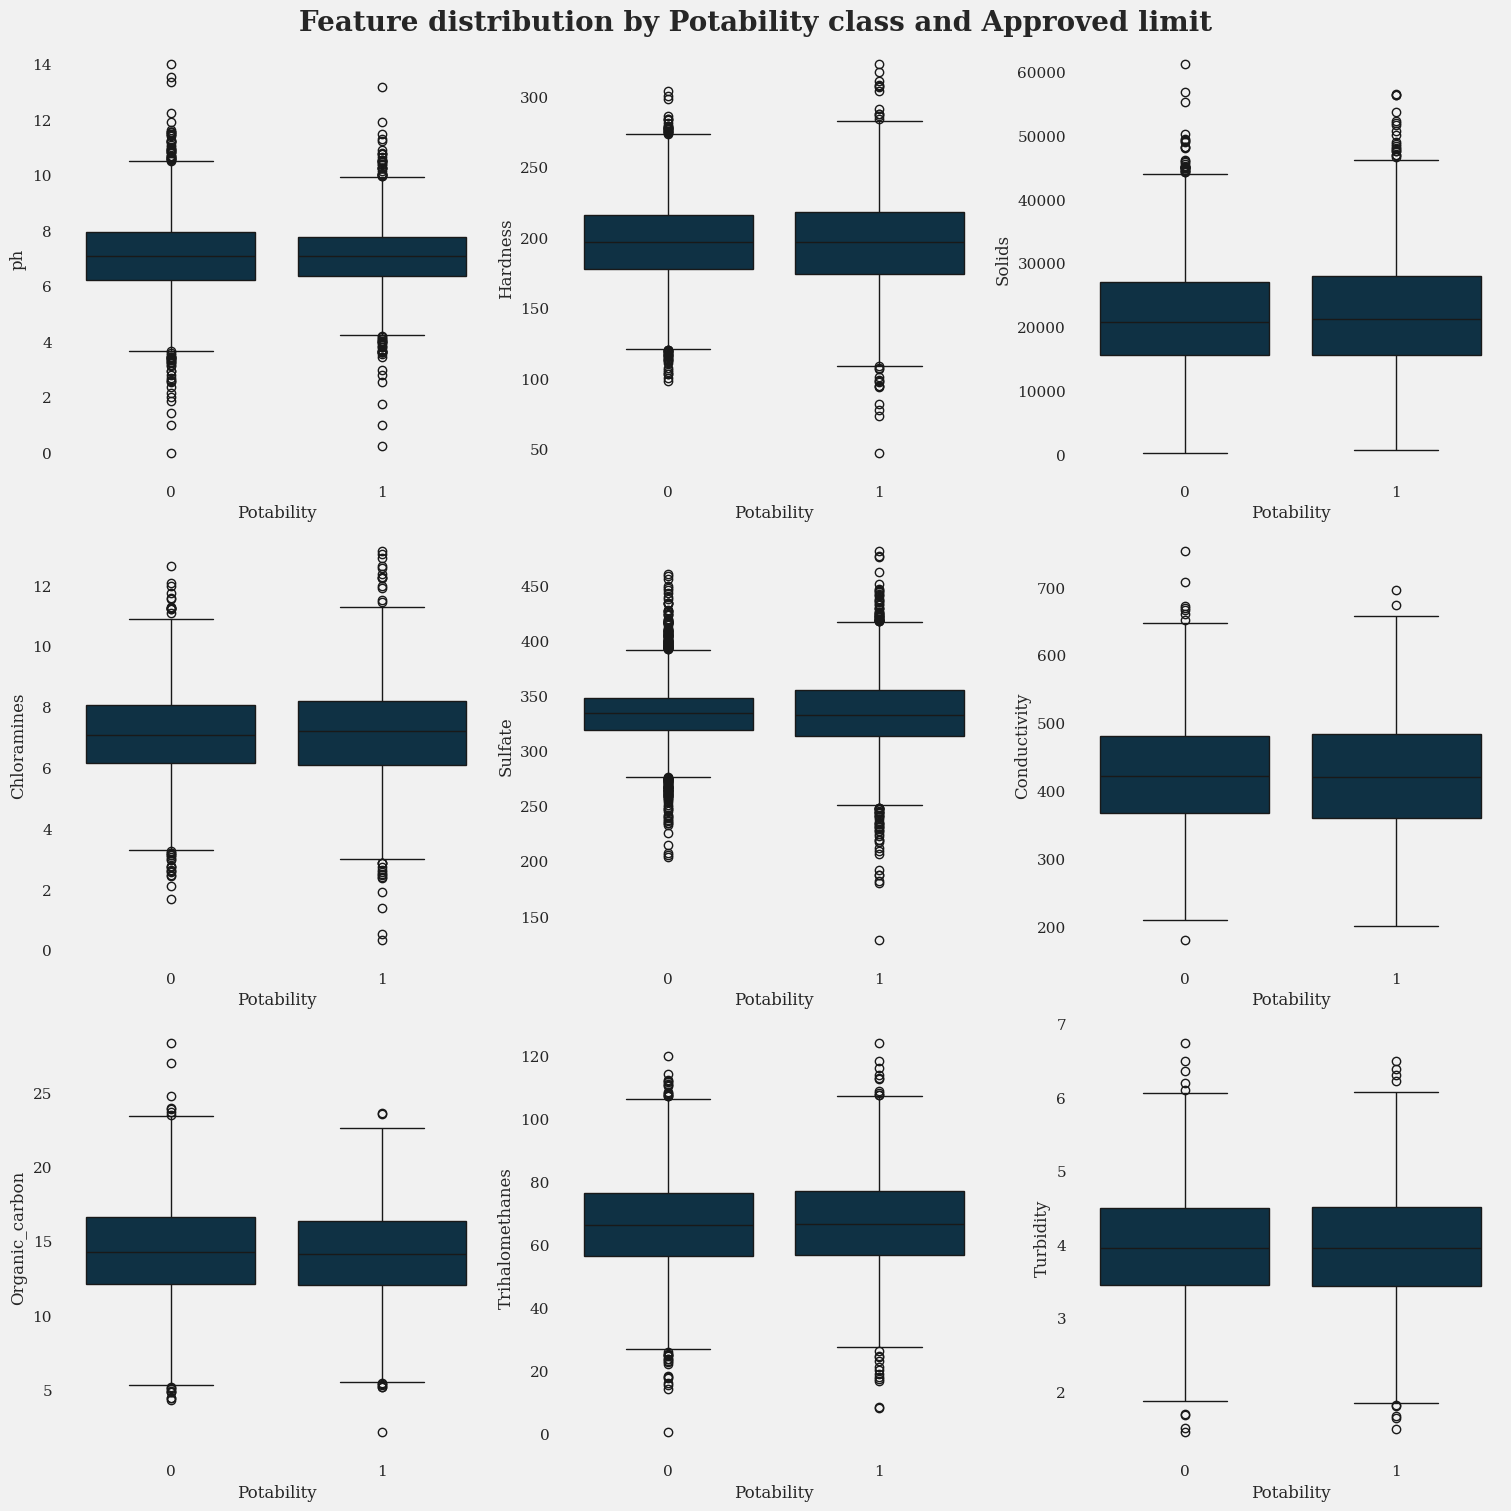

In [20]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)


### Hypothesis testing
Ho (Null Hypothesis) - Mean for both samples/group are same
H1 (Alternate Hypothesis) - Mean for both samples/group significantly different.
Significant level - 90%
Alpha - 0.5% (ie., 0.1)

p_value for ph is 0.8257362194511633 we accept the null hypothesis
p_value for Hardness is 0.42854158740864634 we accept the null hypothesis
p_value for Solids is 0.053463638184504905 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Chloramines is 0.17361022465074655 we accept the null hypothesis
p_value for Sulfate is 0.12292453703923878 we accept the null hypothesis
p_value for Conductivity is 0.6418845485973537 we accept the null hypothesis
p_value for Organic_carbon is 0.08599746163873831 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Trihalomethanes is 0.675988889793878 we accept the null hypothesis
p_value for Turbidity is 0.9279391620838058 we accept the null hypothesis


Text(6, 0.12, 'Significance level: 0.1')

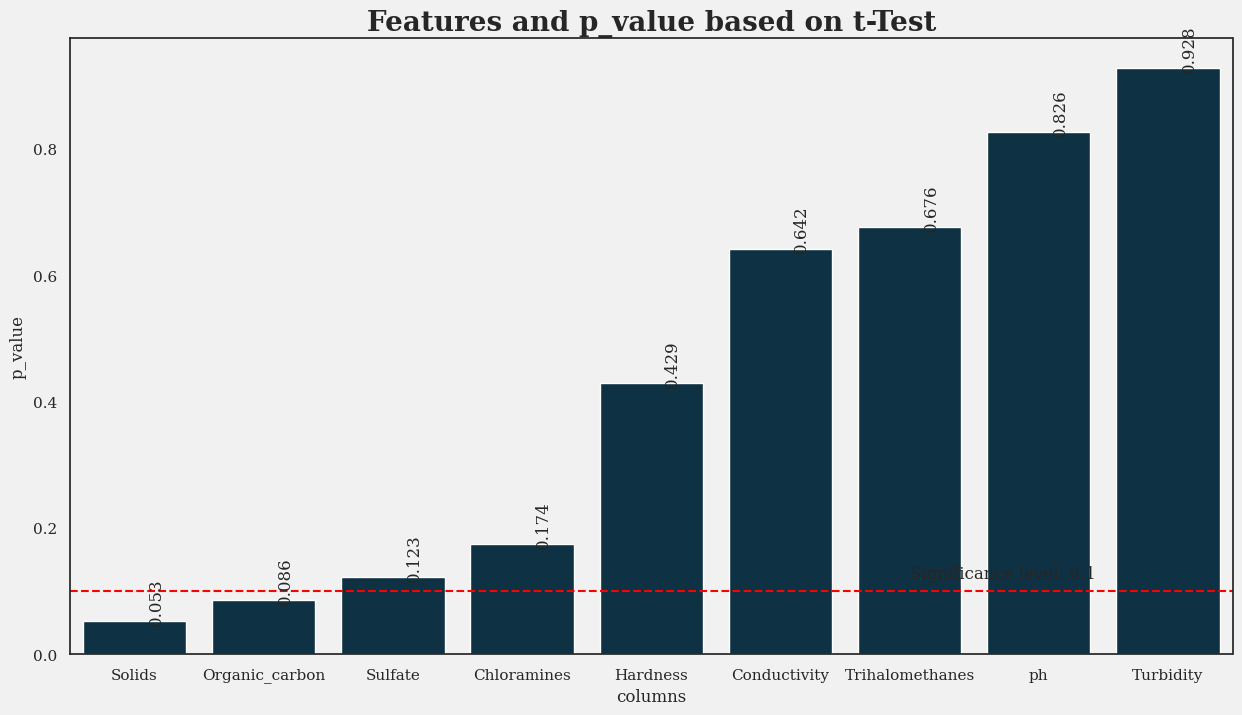

In [21]:
from scipy.stats import ttest_ind
p_val=[]
for i in int_cols:
    pota_1 = df[df['Potability']==1][i]
    pota_0 = df[df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value <0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

stats_test=pd.DataFrame(columns=['columns','p_value'])
stats_test['columns']=int_cols
stats_test['p_value']=p_val
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=stats_test, x='columns',y='p_value')
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for i in ax.patches:
    ax.text(x=i.get_x()+0.5, y=i.get_height(), s=i.get_height(), rotation=90)
ax.axhline(y=0.1, color='red', ls='--')
ax.text(x=6, y=0.12, s="Significance level: 0.1")


##### From the above Hypothesis testing, we can see that the features solid & Organic_carbon have significant difference in potable & non-potable water. other features shares similarities between two classes.

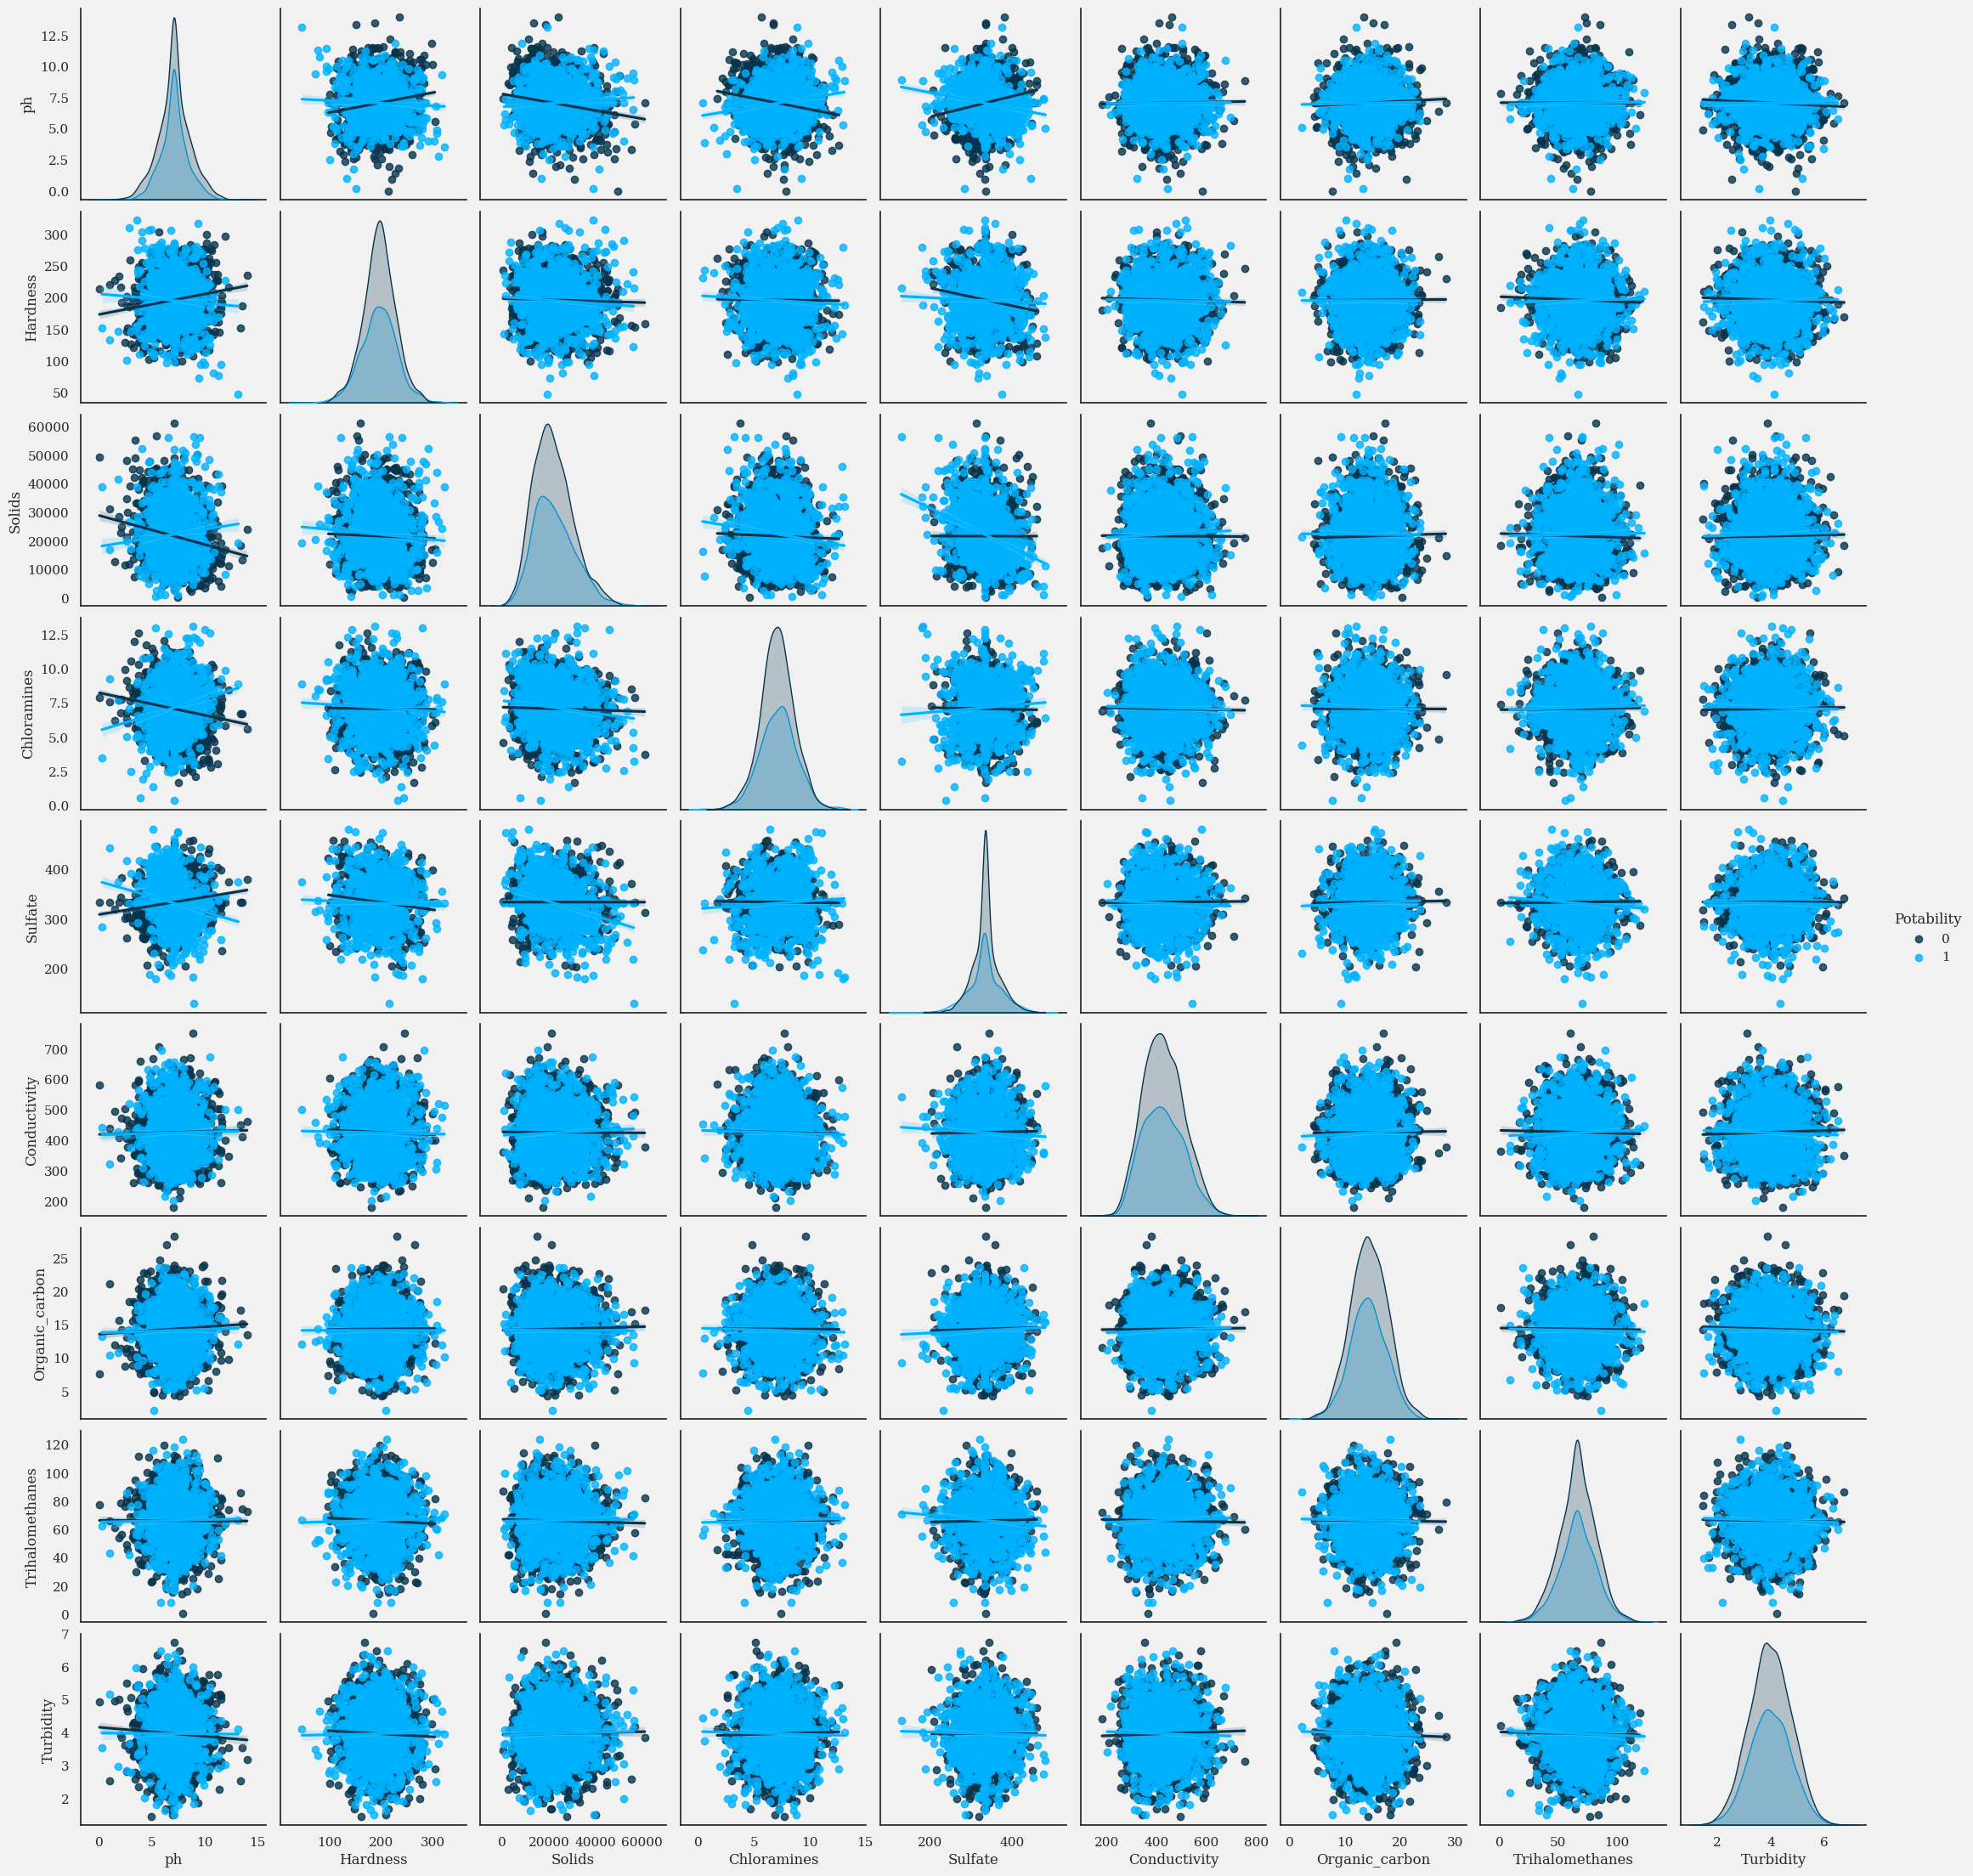

In [22]:
sns.pairplot(df, hue='Potability', kind='reg')

<Axes: >

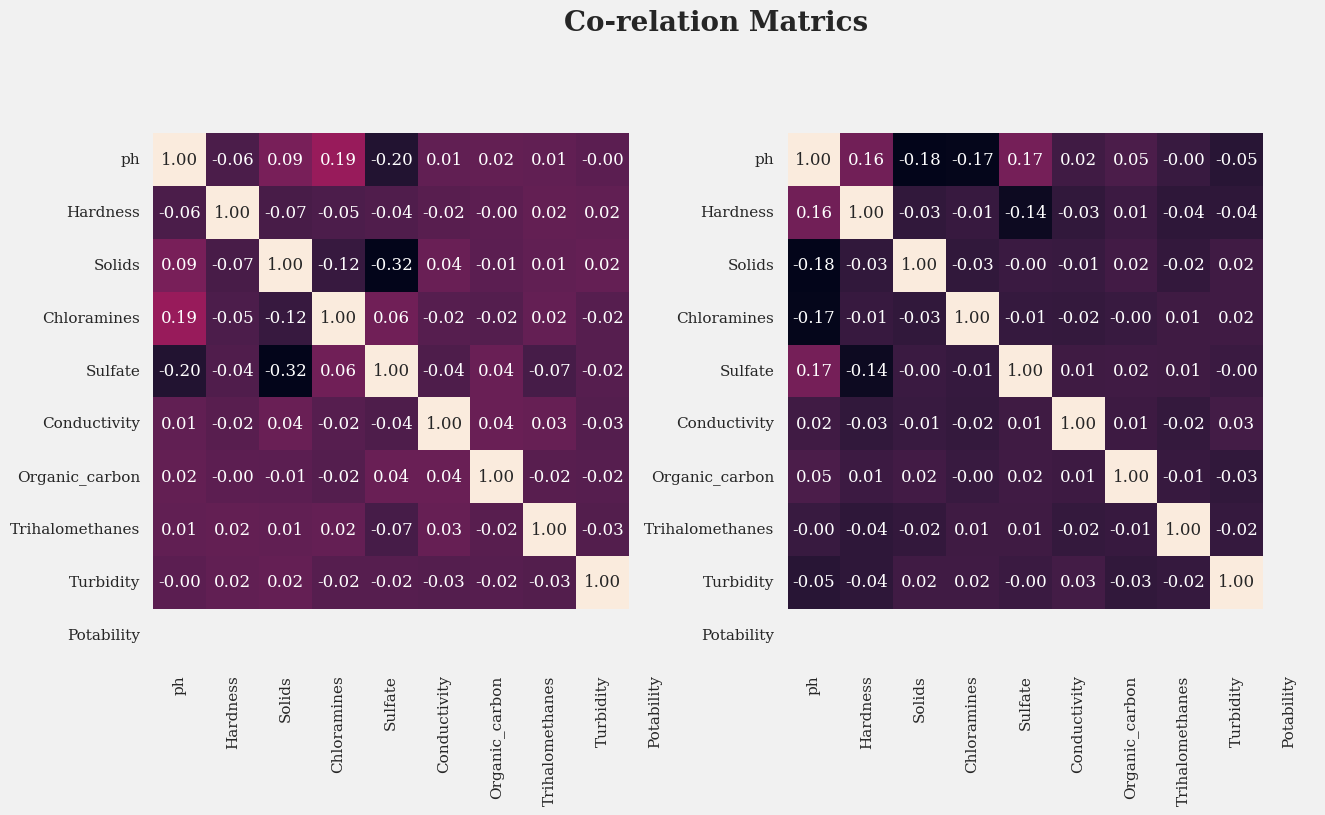

In [23]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(df[df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(df[df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

<Axes: >

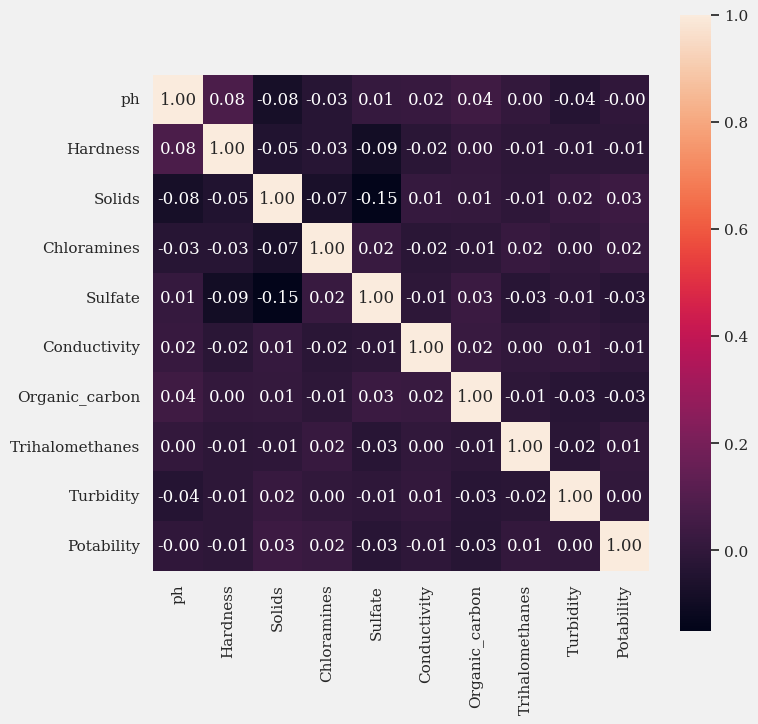

In [24]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

Both Co-relation matrix & Paiplot says that there is no linear relationship between the features that can explan the target variable. So, Linear model may not work on this problem. we need to try with probability based models

### PCA to check the explained variance

<Axes: >

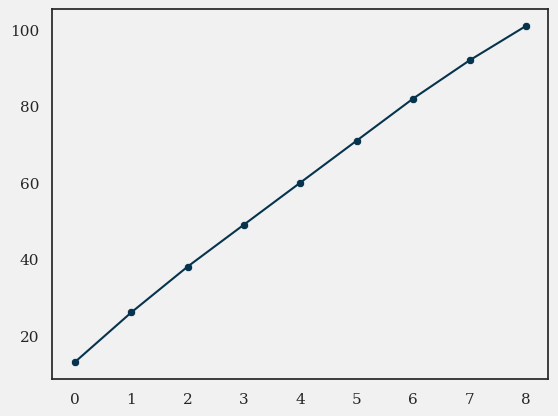

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.drop(['Potability'], axis=1)
y=df['Potability']

scale = StandardScaler()
X_scaled = scale.fit_transform(X)
decom = PCA(svd_solver='auto') 
decom.fit(X_scaled)
ex_var=np.cumsum(np.round(decom.explained_variance_ratio_,2))*100
sns.lineplot(y=ex_var, x=np.arange(0,len(ex_var)))
sns.scatterplot(y=ex_var, x=np.arange(0,len(ex_var)))

In [26]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [27]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
4,ExtraTreeClassifier(),0.612579
5,KNeighborsClassifier(),0.650875
0,AdaBoostClassifier(),0.685815
3,DecisionTreeClassifier(),0.726482
1,BaggingClassifier(),0.747980
2,GradientBoostingClassifier(),0.759743


From the above basic modeling techinique, average cv score for GradientBoosting & BaggingClassifier is high compared to other models. so, let us try to do hyper tunning for these model to improve the accuracy

### lets try to fine tune the GradientBoosting & Bagging Classifier models

In [28]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")

Best Estimator: {'n_estimators': 700} , Best Score : 0.7711708307484068
Best Estimator: {'n_estimators': 300} , Best Score : 0.7805769556144606


### GradientBoosting

              precision    recall  f1-score   support

           0       0.84      0.75      0.80       510
           1       0.65      0.77      0.71       309

    accuracy                           0.76       819
   macro avg       0.75      0.76      0.75       819
weighted avg       0.77      0.76      0.76       819



<Axes: >

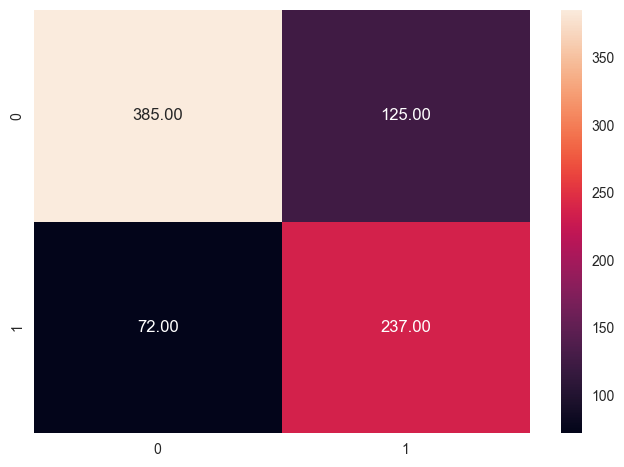

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
model = GradientBoostingClassifier(n_estimators=700)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       510
           1       0.66      0.72      0.69       309

    accuracy                           0.76       819
   macro avg       0.74      0.75      0.75       819
weighted avg       0.76      0.76      0.76       819



<Axes: >

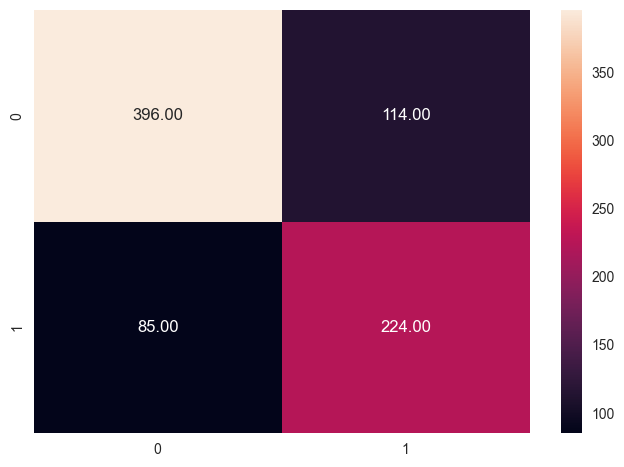

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
model = BaggingClassifier(n_estimators=300)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

In [31]:
model.predict_proba(X_test)

array([[0.85333333, 0.14666667],
       [0.58      , 0.42      ],
       [0.73666667, 0.26333333],
       ...,
       [0.05      , 0.95      ],
       [0.84333333, 0.15666667],
       [0.62666667, 0.37333333]])

### Try with H2o AutoML

In [32]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='2G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "18.0.2.1" 2022-08-18; Java(TM) SE Runtime Environment (build 18.0.2.1+1-1); Java HotSpot(TM) 64-Bit Server VM (build 18.0.2.1+1-1, mixed mode, sharing)
  Starting server from /Users/Anushka/miniforge3/envs/my_env38/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/6t/ljxf9tfd5j32hqvb_k5w289r0000gn/T/tmps7s4gmut
  JVM stdout: /var/folders/6t/ljxf9tfd5j32hqvb_k5w289r0000gn/T/tmps7s4gmut/h2o_mohit_started_from_python.out
  JVM stderr: /var/folders/6t/ljxf9tfd5j32hqvb_k5w289r0000gn/T/tmps7s4gmut/h2o_mohit_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,"21 days, 2 hours and 50 minutes"
H2O_cluster_name:,H2O_from_python_mohit_qutlxh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [33]:
h2o_df = h2o.H2OFrame(df)
h2o_df['Potability']=h2o_df['Potability'].asfactor()
X=h2o_df.columns[0:-1]
y=h2o_df.columns[-1]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [34]:
train, test=h2o_df.split_frame(ratios=[.7])
print(train.nrows)
print(test.nrows)


2295
981


In [56]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [35]:
aml = H2OAutoML(balance_classes=True)
aml.train(x=X, y=y, training_frame=train)


AutoML progress: |
23:01:41.425: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),14/60
# GBM base models (used / total),9/46
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),4/11
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [36]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_3_AutoML_1_20240730_230141,0.869019,0.418979,0.837044,0.237706,0.373422,0.139444
StackedEnsemble_AllModels_2_AutoML_1_20240730_230141,0.867834,0.42425,0.835681,0.234283,0.375172,0.140754
StackedEnsemble_AllModels_1_AutoML_1_20240730_230141,0.866961,0.42582,0.834064,0.23181,0.376172,0.141505
StackedEnsemble_BestOfFamily_4_AutoML_1_20240730_230141,0.866525,0.429354,0.832727,0.236416,0.376308,0.141608
GBM_2_AutoML_1_20240730_230141,0.865737,0.433915,0.830557,0.233853,0.377853,0.142773
StackedEnsemble_BestOfFamily_2_AutoML_1_20240730_230141,0.865591,0.429855,0.832194,0.238136,0.376827,0.141999
StackedEnsemble_BestOfFamily_3_AutoML_1_20240730_230141,0.865392,0.430863,0.83092,0.236129,0.376935,0.14208
GBM_grid_1_AutoML_1_20240730_230141_model_17,0.865296,0.437288,0.831502,0.234606,0.378707,0.143419
GBM_grid_1_AutoML_1_20240730_230141_model_30,0.862965,0.438506,0.82977,0.236434,0.380421,0.14472
GBM_4_AutoML_1_20240730_230141,0.862392,0.439922,0.828147,0.231918,0.380892,0.145079


In [37]:
type(test['Potability'])

h2o.frame.H2OFrame

In [38]:
pred = aml.leader.predict(test)
y_val = h2o.as_list(test['Potability'], use_pandas=True)
pred_val = h2o.as_list(pred['predict'], use_pandas=True)
print(classification_report(y_val,pred_val))

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       603
           1       0.67      0.83      0.74       378

    accuracy                           0.78       981
   macro avg       0.78      0.79      0.78       981
weighted avg       0.80      0.78      0.78       981



/Users/Anushka/miniforge3/envs/my_env38/lib/python3.8/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/Anushka/miniforge3/envs/my_env38/lib/python3.8/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
